<a href="https://colab.research.google.com/github/mblackstock/notebooks/blob/main/notebooks/Movie_Ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we'll do some data loading, wrangling and plot some data from movie ratings.  The data is from...

In [11]:
# !rm -rf notebooks
# !git clone https://github.com/mblackstock/notebooks.git
!ls notebooks/data



bike_sales  movies  names


Load the movie data

In [17]:
import pandas as pd

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('notebooks/data/movies/ml-1m/users.dat',sep='::', header=None, names=unames)

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('notebooks/data/movies/ml-1m/ratings.dat',sep='::', header=None, names=rnames)

mnames = ['movie_id', 'title', 'genre']
movies = pd.read_table('notebooks/data/movies/ml-1m/movies.dat',sep='::', header=None, names=mnames)


/usr/local/lib/python3.7/dist-packages/pandas/io/parsers.py:767: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


merge it, creating a wide table

In [19]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genre
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


pivot the table, with title as the index, and rating as the only column, using the mean aggregation function.  We now have the average rating of all movies!

In [22]:
mean_ratings = data.pivot_table('rating', index='title', aggfunc='mean')
mean_ratings

,rating
title,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568
...,...
"Zed & Two Noughts, A (1985)",3.413793
Zero Effect (1998),3.750831
Zero Kelvin (Kj�rlighetens kj�tere) (1995),3.500000


Now, what we want to do is know what movies actually have been rated more than a few times, otherwise, noone is seeing them.

In [55]:
ratings_by_title = data.groupby('title').size()
ratings_by_title

title
$1,000,000 Duck (1971)                         37
'Night Mother (1986)                           70
'Til There Was You (1997)                      52
'burbs, The (1989)                            303
...And Justice for All (1979)                 199
                                             ... 
Zed & Two Noughts, A (1985)                    29
Zero Effect (1998)                            301
Zero Kelvin (Kj�rlighetens kj�tere) (1995)      2
Zeus and Roxanne (1997)                        23
eXistenZ (1999)                               410
Length: 3706, dtype: int64

Now, lets get the index values of the ratings_by_title series where the number of ratings is greater than or equal to 250

In [24]:
active_titles = ratings_by_title.index[ratings_by_title >=250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

Now we select only the rows that are in the active titles list

In [54]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

,rating
title,
"'burbs, The (1989)",2.910891
10 Things I Hate About You (1999),3.422857
101 Dalmatians (1961),3.596460
101 Dalmatians (1996),3.046703
12 Angry Men (1957),4.295455
...,...
Young Guns (1988),3.418149
Young Guns II (1990),2.907859
Young Sherlock Holmes (1985),3.390501


now, lets sort them by rating, descending order, and plot the top movie ratings

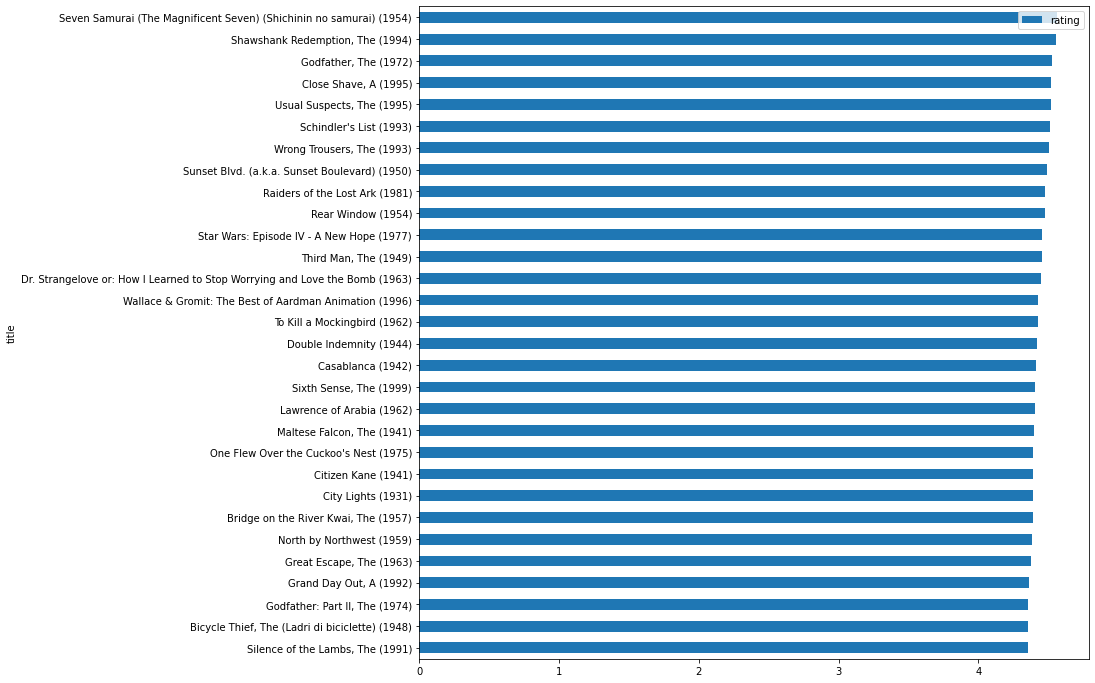

In [52]:
top_10 = mean_ratings.sort_values(by='rating',ascending=False)
ax = top_10.head(30).plot(kind='barh', figsize=(12,12))
ax.invert_yaxis()
